## Notes about this template

1. This Jupyter Notebook is a template that must be used for A/B test report, as it is aligned with the grading criteria. Not following this template may have an impact on the grade. Please follow all the instructions included here. 
2. The appendix with the answers to the Data Ethics Decision Aid is to be handed in on a separate Canvas assignment, and in Word or PDF (not Jupyter notebook). See instructions on Canvas.

# A/B Test Report

* Student Name: Dongdong Zhu
* Student Number: 13523171
* Date: Oct 20, 2024
* Wordcount per section:
  * Introduction and Theoretical Justification: 310
  * Gathering data: 219
  * Data Exploration & Evaluation: 199
  * Evaluation: 333
  * Limitations and Next Steps: 235
  * Ethical and Normative Considerations: 244

## Introduction and Theoretical Justification

Doing data analysis is not just about crunching the numbers, but also explaining what is being done, and why. Moreover, it is important to document your steps in a way that other analysts (or even yourself) can understand what was done, with what type of data, and based on what assumptions.

This section briefly introduces the organization, the communication challenge and proposes a general RQ so that the reader has enough context to understand the actual analysis being done in the notebook. This section also provides theoretical justification leading up to one hypothesis that will be tested in the A/B test.




**Answer:**<br>
The organization selected is Xiaomi, a smartphone company that ranked 3rd in global smartphone market share in 2024. Xiaomi faces a communication challenge as it tries to transition from being a cost-effective brand to a high-end one. This shift has led to complaints from loyal customers about rising prices, while its product quality is often questioned by new customers as not being on par with other high-end brands like Samsung and Apple. While Xiaomi is highly dependent on its e-commerce channels (Giachetti, 2017), research finds that online consumer reviews (OCRs) can significantly impact users' purchasing decisions (Lovett et al., 2013), which can be further classified into emotional and functional categories(Jang et al, 2021). 

To develop more targeted marketing strategies, Xiaomi needs to identify which type of reviews are more effective in driving sales for its high-end phones.The research question is:<br>
On Xiaomi's official website (mi.com), what type of positive consumer reviews leads to higher sales of flagship smartphones?

As Jang et al.(2021) argued, functional OCRs related to product quality and ease-of use tends to drive the most sales, with an interaction effect from emotional positive OCRs. Therefore, this study proposes the following hypotheses:

***H1:*** Users exposed to functionally positive comments will be more likely to make a purchase (a) and spend a higher amount (b) compared to those exposed to emotionally positive comments.

***H2:*** Users exposed to emotionally positive comments will be more likely to make a purchase (a) and spend a higher amount (b) compared to those exposed to regular positive comments.

Furthermore, the referral source is included as a moderator in this case. I argue that users from social media channels (i.e., those who are familiar with Xiaomi and follow its social media accounts) will be more influenced by both emotionally and functionally positive reviews:

***H3:*** Referrals from social media have a positive moderating effect on purchase amounts.

*(Wordcount: 310)*

## Gathering Data

In the cells below you should load the dataset(s) into pandas to begin the data understanding and preparation. It is important to provide the reader with sufficient information to understand how the data were collected, and what the dataset is about. 

More specifically, you should answer at least adress the following topics in this section:
* What is the dataset about? How does it relate to the business challenge?
* What is the source of the data? 
    * You can for example think of Google Analytics or data collected through social media (when e.g., tracking effectiveness of campaigns)
* How were the data collected? What type of data collection (and/or sampling) strategy was used, and why? 
* What are the potential biases that could be introduced in the dataset because of the data collection method?
* How was privacy taken in consideration during data collection? What are some of the risks and/or privacy trade-offs that should be considered?

As a tip: use a meaningful name for your dataset(s) when loading them into a Pandas dataframe. Calling them just *df* or *data* will become confusing later on.

**IMPORTANT:** As part of open science and replicability, it is important to indicate also to the reader where the data is stored or located. In the case of the report, we expect you to upload the dataset to our SurfDrive folder, so we can download the data and replicate your results.


### 2.1 Explannation of data gathering

Data was be collected from the English purchasing page of the Xiaomi 14 Ultra, the brand's latest flagship model, on its official e-commerce website, mi.com. The collection period will run from February 1 to 30 in 2025, after the shopping festivals at the end of year to avoid discount-related influences and ensure regular user feedback. Thus, typical purchase data for Xiaomi’s high-end product can be obtained.

Following the brief's design, positive reviews will be categorized into emotional, functional, and regular types based on Jang et al. (2021). 1% of visitors will be randomly assigned to one of three groups: Group A (emotional reviews), Group B (functional reviews), and Group C (regular reviews). Each group will see 300 reviews, while negative and neutral reviews remain unchanged. The datasets include (1) Metrics: id, purchase, purchase_amount; (2) Users: id, regions; (3)Information: session_id, user_id, condition, referral, to conduct two 2x3 designs with all variables included.

A potential bias is that the data only includes users from the brand's website, likely those already familiar with the brand, excluding consumers from other channels like third-party distributors. Though users have read the agreements to share their cookies with the website, data spillover could exist. Users' shopping data was collected, like address andreferral channel, their behavior patterns such as comsumption and media use habits can be inferred.

*(Wordcount: 219)*

### 2.2 Loading the datasets

In [1]:
import pandas as pd
import numpy as np
import csv

#### 2.2.1 Metrics

In [2]:
metrics_jsonl = pd.read_json("Zhu_Dongdong_s_metrics.jsonl", lines = True)

In [3]:
metrics = pd.json_normalize(metrics_jsonl["dataset"])
metrics.head()

,view,seconds,_purchase,purchase_amount,id
0,1.0,45.50,1.0,98.80,53003
1,1.0,75.25,1.0,163.40,53004
2,1.0,98.00,1.0,212.80,53008
3,1.0,77.00,1.0,167.20,53009
4,1.0,62.65,1.0,136.04,53011


In [4]:
metrics.shape

(5623, 5)

In [5]:
metrics.isna().sum()

view               0
seconds            0
_purchase          0
purchase_amount    0
id                 0
dtype: int64

**Explanation of the code:**<br>
The dataset `metrics` was imported and examined. It includes data of id, purchases and amount. There are no missing values in ths dataset.

#### 2.2.2 Users

In [6]:
users = pd.read_csv("Zhu_Dongdong_s_info_users.csv.gz", compression = "gzip")
users.head()

,user_reg_name,user_age,user_country_of_origin,id
0,Jeremy Banks,78,CU,724
1,Jason Hughes,76,NaN,15830
2,Katherine Hernandez,20,NL,6845
3,Laura Hebert,53,NaN,5906
4,Robert Anderson,28,NaN,3911


In [7]:
users.shape

(12827, 4)

In [8]:
users.isna().sum()

user_reg_name                0
user_age                     0
user_country_of_origin    5524
id                           0
dtype: int64

**Explanation of the code:**<br>
`Users` was imported and examined, and it includes users' information such as id, age, reg_name and country of origin. The result shows that only `user_country_of_origin` include missing values.

#### 2.2.3 Infomation

In [9]:
info = pd.read_csv("Zhu_Dongdong_s_info.csv.gz", compression = "gzip")
info.head()

,session_timestamp,device,ABtest,referral,geoNetwork_country,city,sessioninfo_id,userid
0,2023-02-08 16:00:01,Mozilla/5.0 (iPod; U; CPU iPhone OS 4_1 like M...,version_B,google.com,NaN,Lake Samuelview,53001,0
1,2023-02-04 16:56:53,Opera/9.74.(X11; Linux x86_64; fur-IT) Presto/...,version_B,facebook.com,NL,Leetown,53002,1
2,2023-02-06 23:45:33,Mozilla/5.0 (X11; Linux i686; rv:1.9.7.20) Gec...,version_B,instagram.com,NL,North Jeremyborough,53003,2
3,2023-02-04 16:49:18,Mozilla/5.0 (compatible; MSIE 5.0; Windows 98;...,NaN,skyscanner.com,NL,East Debraport,53004,3
4,2023-02-09 01:42:28,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_3...,version_A,https://smith-martinez.com/,NL,Deniseton,53005,4


In [10]:
info.shape

(16034, 8)

In [11]:
info.isna().sum()

session_timestamp        0
device                   0
ABtest                4069
referral                 0
geoNetwork_country    6946
city                     0
sessioninfo_id           0
userid                   0
dtype: int64

**Explanation of the code:**<br>
The dataset `info` was imported, and it includes session information, sessioninfo_id, user_id, AB test condition, referral and geography information.

### 2.3. Merging the datasets

In [12]:
#align the ID names in each dataset and distinguish them into sessioninfo_id and user_id
metrics["sessioninfo_id"] = metrics["id"]
users["userid"] = users["id"]

In [13]:
info.dtypes

session_timestamp     object
device                object
ABtest                object
referral              object
geoNetwork_country    object
city                  object
sessioninfo_id         int64
userid                 int64
dtype: object

In [14]:
metrics.dtypes

view               float64
seconds            float64
_purchase          float64
purchase_amount    float64
id                   int64
sessioninfo_id       int64
dtype: object

In [15]:
users.dtypes

user_reg_name             object
user_age                   int64
user_country_of_origin    object
id                         int64
userid                     int64
dtype: object

In [16]:
da = info.merge(metrics, on = "sessioninfo_id", how = "left")

In [17]:
da = info.merge(metrics, on = "sessioninfo_id", how = "left")

In [18]:
df = da.merge(users, on = "userid", how = "left")

In [19]:
len(df), len(da), len(users)

(16034, 16034, 12827)

**Explanation of the code:**<br>
In this part, three datasets were merged into one final dataframe `df`. <br>
The foregin key in each datasetwas identified and aligned. Since `metrics` contains only purchase data and `users` only includes part of registered visitors' data, `metrics` was left-joined `info` using the `sessioninfo_id` to get `da`, and then `users` then was left-joined `da` using `userid` to get the final completed dataframe.

### 2.4. Minimizing the dataset

In [20]:
df.columns

Index(['session_timestamp', 'device', 'ABtest', 'referral',
       'geoNetwork_country', 'city', 'sessioninfo_id', 'userid', 'view',
       'seconds', '_purchase', 'purchase_amount', 'id_x', 'user_reg_name',
       'user_age', 'user_country_of_origin', 'id_y'],
      dtype='object')

In [21]:
df = df[['sessioninfo_id', 'userid', 'ABtest', '_purchase', 'purchase_amount', 'referral']]

**Explanation of the code:**<br>
Only essential columns were left in the final dataframe, including the id information, the independent variable `ABtest`, the dependent variables `_purchase`, `purchase_amount` and the moderator `referral`.

## Data Cleaning

As discussed during the tutorials, the stages of data understanding (which we call *Data Exploration & Evaluation* in the evaluation criteria) and data preparation (which we call *Data Cleaning* in the evaluation criteria) are iterative steps, with a lot of back and forth until you have a usable dataset.

In this stage, we expect you to meet the criteria included in the course guide. While doing this, you need to make sure that you are also clearly communicating what is being done in each step. This includes:
* Identifying the key variables that your study will use
* Explaining to the reader what these variables are
* Performing the steps regarding data cleaning and data exploration as indicated on Canvas (briefing)
* Explaining to the reader at each step what is being done, and what the output/result means

**IMPORTANT:**
* You only need to do the cleaning and exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study. This will also allow you to minimize the dataset.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.
* If you use functions to categorize your data, you should explain how the functions were built (or where they came from), and what is being done.

### 3.1. Inspecting data

In [22]:
df.head()

,sessioninfo_id,userid,ABtest,_purchase,purchase_amount,referral
0,53001,0,version_B,NaN,NaN,google.com
1,53002,1,version_B,NaN,NaN,facebook.com
2,53003,2,version_B,1.0,98.8,instagram.com
3,53004,3,NaN,1.0,163.4,skyscanner.com
4,53005,4,version_A,NaN,NaN,https://smith-martinez.com/


**Identification of the key variables:**<br>
The key variables in this study includes:<br>
(1) The independent variable: `ABtest`, which means to which group the users have been assigned to.<br>
(2) The dependent variable: `_purchase`, which means if the users made the purchase or not; `purchase_amount`, which means the amounts of users purchased.<br>
(3) The moderator: `referral`, which means channels that users were referred from.

#### 3.1.1 Checking missing values & corruption

In [23]:
#check the number of missing value in each column
missing_values = df.isna().sum()
print(missing_values)

sessioninfo_id         0
userid                 0
ABtest              4069
_purchase          10411
purchase_amount    10411
referral               0
dtype: int64


In [24]:
#replace the infinite values with missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#### 3.1.2 Checking data distribution

In [25]:
df["ABtest"].value_counts()

ABtest
version_A    6025
version_B    5940
Name: count, dtype: int64

In [26]:
df["_purchase"].value_counts()

_purchase
1.0    5623
Name: count, dtype: int64

In [27]:
df["purchase_amount"].value_counts()

purchase_amount
106.4    631
228.0    611
91.2     555
121.6    493
197.6    486
        ... 
3.0        1
216.0      1
68.0       1
13.0       1
201.0      1
Name: count, Length: 291, dtype: int64

In [28]:
df["purchase_amount"].describe()

count    5623.000000
mean      156.813936
std        50.054102
min         3.000000
25%       106.400000
50%       164.160000
75%       197.600000
max       228.000000
Name: purchase_amount, dtype: float64

In [29]:
df["referral"].value_counts()

referral
google.com                     4951
instagram.com                  2521
facebook.com                   1258
 facebook.com                  1216
skyscanner.com                 1176
                               ... 
https://www.wade.info/            1
http://www.wagner.com/            1
https://wagner.com/               1
http://www.ferguson.com/          1
https://smith-martinez.com/       1
Name: count, Length: 1139, dtype: int64

### 3.2. Handling missing values

#### 3.2.1 AB Test conditions

In [30]:
df.loc[:, "ABtest"] = df["ABtest"].fillna("version_C")
df["ABtest"] = df["ABtest"].astype(str)

In [31]:
df["ABtest"].value_counts()

ABtest
version_A    6025
version_B    5940
version_C    4069
Name: count, dtype: int64

In [32]:
df["ABtest"].isna().sum()

0

**Explanation of the code:**<br>
For the conditions in `ABtest`, the missing values were replaced with "version_C" because users who are not assigned to group A or B were placed in the control group.

#### 3.2.2 Purchase and purchase amount

In [33]:
df.loc[:, "_purchase"] = df["_purchase"].fillna(0)
df["_purchase"] = df["_purchase"].astype(int)

In [34]:
df["_purchase"].value_counts()

_purchase
0    10411
1     5623
Name: count, dtype: int64

In [35]:
df.loc[:, "purchase_amount"] = df["purchase_amount"].fillna(0)
df["purchase_amount"].isna().sum()

0

In [36]:
df["purchase_amount"].describe()

count    16034.000000
mean        54.993436
std         80.488111
min          0.000000
25%          0.000000
50%          0.000000
75%        110.960000
max        228.000000
Name: purchase_amount, dtype: float64

In [37]:
df.head()

,sessioninfo_id,userid,ABtest,_purchase,purchase_amount,referral
0,53001,0,version_B,0,0.0,google.com
1,53002,1,version_B,0,0.0,facebook.com
2,53003,2,version_B,1,98.8,instagram.com
3,53004,3,version_C,1,163.4,skyscanner.com
4,53005,4,version_A,0,0.0,https://smith-martinez.com/


**Explanation of the code:**<br>
For `_purchase` and `purchase_amount`, the missing values were replaced with 0 because it means that users did not make any purchases and the amount is 0.

#### 3.2.3 Creating new variables

In [38]:
def parse_mod(row):
    row['social_media'] = 0
    if any(i in str(row['referral']).lower() for i in ['instagram', 'facebook', 'twitter', 'tiktok']):
        row['social_media'] = 1
    return row

df = df.apply(parse_mod, axis=1)

In [39]:
df["social_media"].value_counts()

social_media
0    10386
1     5648
Name: count, dtype: int64

In [40]:
def parse_iv(row):
    row["GroupA"] = 0
    if row["ABtest"] == "version_A":
        row["GroupA"] = 1

    row["GroupB"] = 0
    if row["ABtest"] == "version_B":
        row["GroupB"] = 1

    row["GroupC"] = 0
    if row["ABtest"] == "version_C":
        row["GroupC"] = 1

    return row

df = df.apply(parse_iv, axis=1)

**Explanation of the code:**<br>
A new variable `social_media` was created in which users from channels like Instagram, Facebook, Twitter, and TikTok were classified as 1, while those from other channels were classified as 0.<br>
Then, dummy variables for the `ABtest` was created, and there are three new variables `GroupA` `GroupB` `GroupC`, with values as 1 or 0 indicating if the user was classfied to this group.

## Data Exploration & Evaluation

In this stage, *after the dataset is considered clean*, you are expected to show to the reader how the final dataset looks like, and perform an exploratory review of the data. At all times, you are expected to write a report-out to stakeholders (i.e., not only show the data, but also explain what the data show).

This includes:
* Descriptives and definitions of all key variables in a clear manner
* Univariate visualizations for key variables 
* Visualization of key bivariate relationships (e.g., related to hypotheses or RQs)
* Checking the data for biases and unbalance (e.g., unequal distributed variables, missing cases)
* Writing a report-out to stakeholders summarising the findings of the data exploration (including what the data already show when it comes to the RQ & hypothesis, and potential risks of bias and unbalance)

Key variables are all variables that are used as DV's or IV's in your hypotheses or RQs.


**IMPORTANT:**
* You only need to do the exploration for the variables that are *relevant* to your study. You can skip variables/columns in the dataset that are absolutely irrelevant to your study.
* You need to communicate your steps clearly to the reader. This means that you should not just do a *df.describe()*  to communicate descriptive statistics in a dataset that contains a lot of irrelevant columns and expect the reader to figure out by her or himself what is relevant. You should instead only show to the reader what is relevant, and explain why.




In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
sns.set_theme(style = "whitegrid", palette = 'deep')
plt.rcParams['font.family'] = 'Monaco'

In [43]:
test_order = ["version_A", "version_B", "version_C"]

**Explanation of the code:**<br>
Before visualizing data, I used the theme setting from [Seaborn](https://seaborn.pydata.org/examples/scatterplot_sizes.html) to use the whitegrid patter and Monaco font aligned with the font of JupyterLab. I also define a list for the order of conditions.

### 4.1. Descriptive statistics and definitions

#### 4.1.1. Independent variables

In [44]:
df["ABtest"].describe()

count         16034
unique            3
top       version_A
freq           6025
Name: ABtest, dtype: object

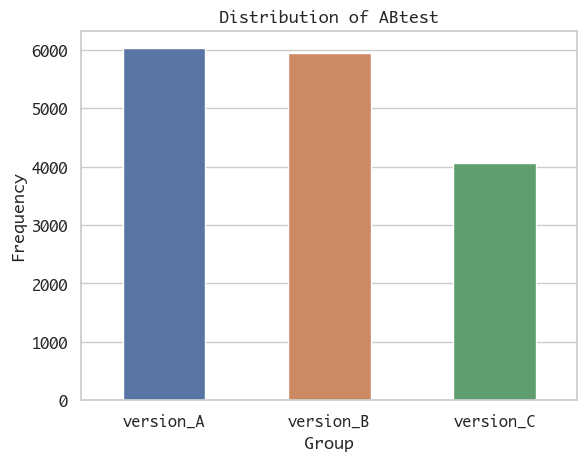

In [45]:
#AB test
sns.countplot(x = "ABtest", data = df, order = test_order,
             width = 0.5)

plt.title("Distribution of ABtest")
plt.xlabel("Group")
plt.ylabel("Frequency")
plt.show()

In [46]:
df["GroupA"].value_counts()

GroupA
0    10009
1     6025
Name: count, dtype: int64

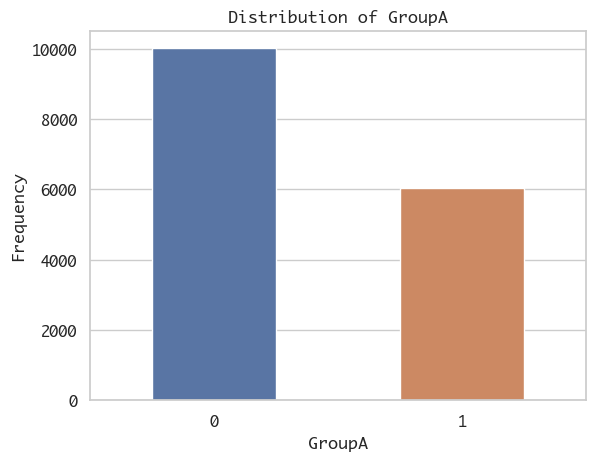

In [47]:
sns.countplot(x = "GroupA", data = df, width = 0.5)

plt.title("Distribution of GroupA")
plt.xlabel("GroupA")
plt.ylabel("Frequency")
plt.show()

In [48]:
df["GroupB"].value_counts()

GroupB
0    10094
1     5940
Name: count, dtype: int64

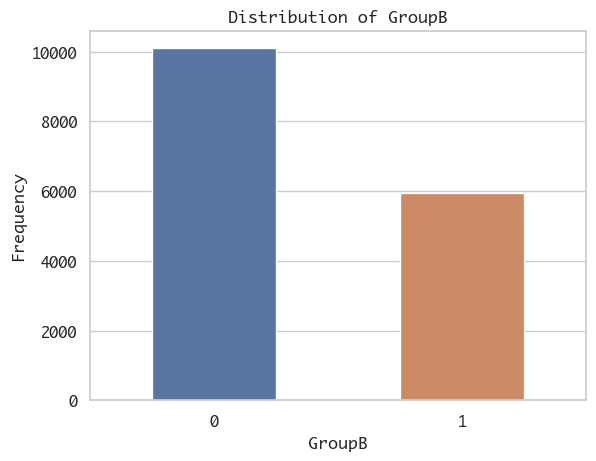

In [49]:
sns.countplot(x = "GroupB", data = df, width = 0.5)

plt.title("Distribution of GroupB")
plt.xlabel("GroupB")
plt.ylabel("Frequency")
plt.show()

In [50]:
df["GroupC"].value_counts()

GroupC
0    11965
1     4069
Name: count, dtype: int64

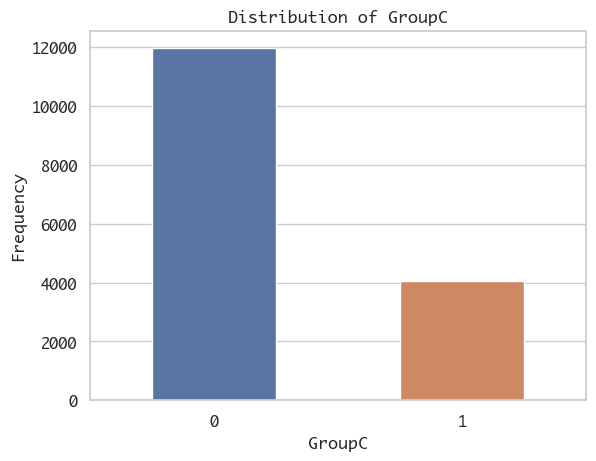

In [51]:
sns.countplot(x = "GroupC", data = df, width = 0.5)

plt.title("Distribution of GroupC")
plt.xlabel("GroupC")
plt.ylabel("Frequency")
plt.show()

**Explanation of Code:**<br>
`ABtest` is a catergorical variable indicating the group to which users have been assigned. Group A indicates exposure to emotionally positive reviews, Group B indicates exposure to functionally positive reviews, and Group C is the control group with regular positive reviews.<br>
`GroupA` `GroupB` `GroupC` is the newly created dummy variables for each group, where 0 indicates that users were not assigned to the group, and 1 indicates that they were.<br>
The result shows that there are 16034 participants in total. 6025 were assigned to GroupA，5940 were assigned to GroupB, and 4069 were assigned to GroupC.

### 4.1.2. Dependent Variables

In [52]:
#1st DV: whether users make a purchase
df["_purchase"].describe()

count    16034.000000
mean         0.350692
std          0.477202
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: _purchase, dtype: float64

In [53]:
#1st DV: whether users make a purchase
df["_purchase"].value_counts()

_purchase
0    10411
1     5623
Name: count, dtype: int64

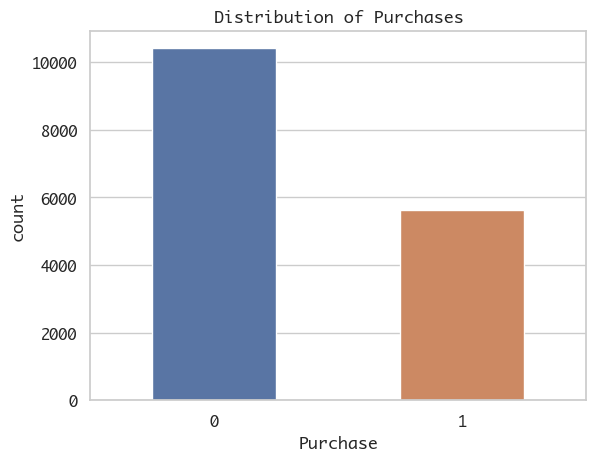

In [54]:
#1st DV: whether users make a purchase
sns.countplot(x = "_purchase", data = df, width = 0.5)

plt.title("Distribution of Purchases")
plt.xlabel("Purchase")
plt.show()

In [55]:
#2nd DV: the purchase amount users made
df["purchase_amount"].describe()

count    16034.000000
mean        54.993436
std         80.488111
min          0.000000
25%          0.000000
50%          0.000000
75%        110.960000
max        228.000000
Name: purchase_amount, dtype: float64

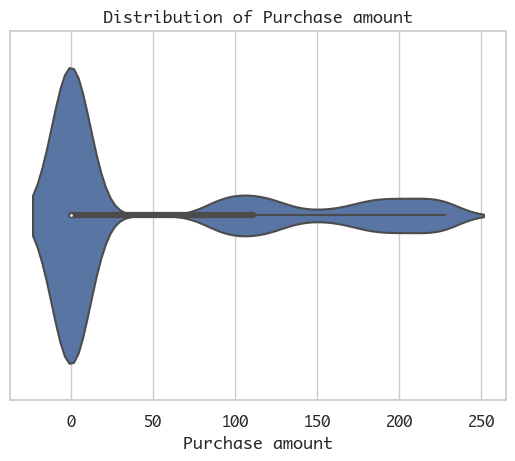

In [56]:
#2nd DV: the purchase amount users made
sns.violinplot(x = "purchase_amount", data = df)

plt.title("Distribution of Purchase amount")
plt.xlabel("Purchase amount")
plt.show()

/Users/zhuzhu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


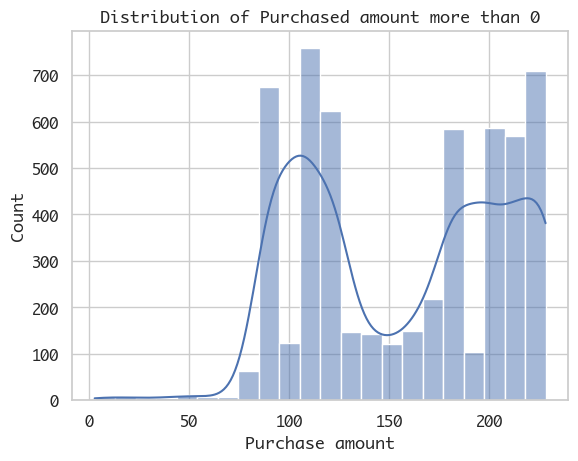

In [57]:
#take a closer look at the purchase amounts more than 0
purchased = df[df["purchase_amount"] != 0]

sns.histplot(x = "purchase_amount", data = purchased, kde = True)

plt.title("Distribution of Purchased amount more than 0")
plt.xlabel("Purchase amount")
plt.show()

**Definitions**<br>
There are two dependent variables in this assignment: (1) `_purchase` uses 1 or 0 to indicate if users make any purchasement or not. (2)`purchase_amount` indicates the specific amount of their orders.<br>
The result shows that 10411 users did not buy anything, and 5623 made a purchase. The mean of purchase amount is 54.99 (unit: dollar).

#### 4.1.3. Moderator

In [58]:
#moderator: whether the users were referred from social media channels
df["social_media"].value_counts()

social_media
0    10386
1     5648
Name: count, dtype: int64

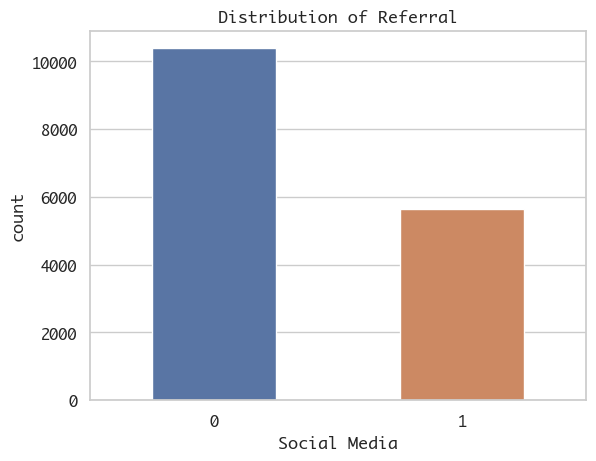

In [59]:
sns.countplot(x = "social_media", data = df, width = 0.5)

plt.title("Distribution of Referral")
plt.xlabel("Social Media")
plt.show()

**Definitions:**<br>
The moderator is `social_media`, where 0 indicates that users were not from social media channels and 1 indicates they were. The result shows that 10386 users were not from social media channels and 5648 were.

### 4.2. Bivariate statistics and visualizations

#### 4.2.1. Purchases by conditions

In [60]:
df["_purchase"].groupby(df["ABtest"]).describe()

,count,mean,std,min,25%,50%,75%,max
ABtest,,,,,,,,
version_A,6025.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
version_B,5940.0,0.557576,0.496716,0.0,0.0,1.0,1.0,1.0
version_C,4069.0,0.567953,0.495422,0.0,0.0,1.0,1.0,1.0


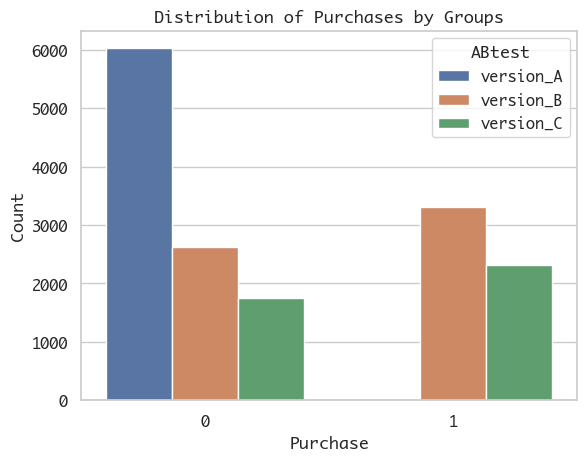

In [61]:
sns.countplot(df, x = "_purchase", hue = "ABtest",
             hue_order = test_order)

plt.title("Distribution of Purchases by Groups")
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.show()

**Explanation of Code:**<br>
In this part I grouped the purchases by conditions, to show how many users made purchases in each condition. The code was from [Seaborn](https://seaborn.pydata.org/tutorial/distributions.html#visualizing-bivariate-distributions).

#### 4.2.2. Purchase amount by conditions

In [62]:
df["purchase_amount"].groupby(df["ABtest"]).describe()

,count,mean,std,min,25%,50%,75%,max
ABtest,,,,,,,,
version_A,6025.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
version_B,5940.0,87.837044,86.642698,0.0,0.0,91.2,180.12,228.0
version_C,4069.0,88.476953,86.008151,0.0,0.0,91.2,181.64,228.0


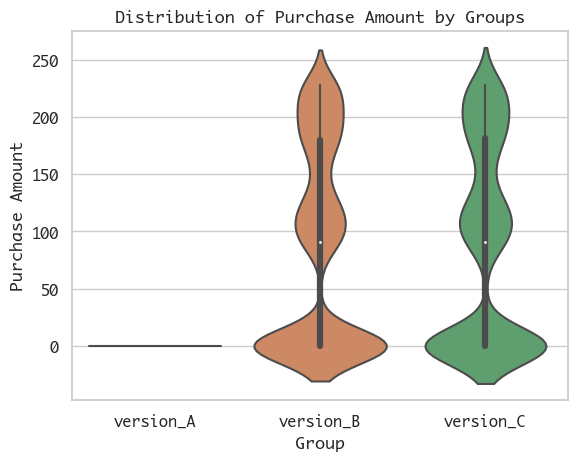

In [63]:
sns.violinplot(data = df, x = "ABtest", y = "purchase_amount", order = test_order, inner = "box")

plt.title("Distribution of Purchase Amount by Groups")
plt.xlabel("Group")
plt.ylabel("Purchase Amount")
plt.show()

**Explanation of Code:**<br>
In this part I grouped the purchase amount by conditions using violin plot, to show the amount of users purchased in each condition.

#### 4.2.3. Purchase amount by conditions and referral

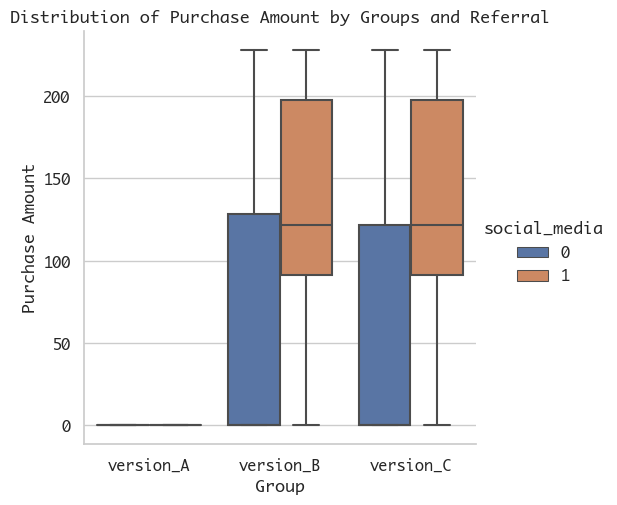

In [64]:
sns.catplot(data = df, 
            x = "ABtest", 
            y = "purchase_amount", 
            hue = "social_media",
            order = test_order,
            kind = "box")

plt.title("Distribution of Purchase Amount by Groups and Referral")
plt.xlabel("Group")
plt.ylabel("Purchase Amount")
plt.show()

**Explanation of Code:**<br>
In this part, I used the box plot to group the purchase amounts by test conditions and referral sources to display the total amount purchased by users in each condition, as well as whether they were referred through social media channels.

### 4.3. Check data biases and unbalance
The main issue with the dataset is that there were no purchases recorded in Group A, likely due to the randomly generated data. However, as I replaced missing values with 0 for purchases, it will not impact the feasibility of the model.<br>
I also tried to randomize and regenerate the data for `AB_test`, `_purchase`, and `purchase_amount` following suggestions proposed by Dr. Strycharz in the issues section on GitHub. However, the newly generated data were always too perfect for statistical models and machine learning applications. Therefore, I decided to use the original database, which, despite being unbalanced, should still allow the code to work.

### 4.4. Report-out of data exploration

Based on the current data exploration and visualization, the following insights can be inferred regarding the research question (RQ) and the hypotheses:<br>

**(1) Purchase Decision Across Conditions:**
Users exposed to Group A (emotionally positive reviews) did not make any purchases. For Group B (functionally positive reviews) and Group C (control group), on average, Group C(0.57) showed a slightly higher mean of purchases made by users in Group B(0.56). However, it is difficult to determine if this difference is statistically significant for now.

**(2) Purchase Amount Across Groups:**
The mean purchase amounts are also very close between Group B (87.83), and Group C (88.47). However, the data patterns of these two groups are very similar, while users in Group A did not make any purchases.

**(3) Referral as a Moderator:**
Users referred from social media tend to have higher purchase amounts than those who were not in Group B and C. But still, the data patterns between those two groups are very similar.

For potential data biases, the data was collected from Xiaomi's official e-commerce website, meaning all users were digitally connected. A large proportion of the population without digital access or with lower digital literacy was excluded, which could lead to data bias.

*(Wordcount: 199)*

## Modeling and Hypothesis Testing

After understanding and preparing the data, you are ready to do the modeling. It is important to explain to the reader:
* Explaining which models will be used, and why
* If appropriate, explaining which strategy you are using to fine tune or improve the model
* Discussion about the model evaluation (i.e., why you believe the model is a good model) and, if appropriate, comparison between different models
* After the appropriate model is identified, then the hypothesis can be tested. You can then report the result of the tests being used to test the hypothesis (as discussed in the criteria for the assignment), explaining to the reader how the test is being made and what the results of the testing mean for the hypothesis at hand. 
* Visualizations (as appropriate) are helpful to explain to the reader what has been found.
* Usage of the model to make predictions (e.g., key audience segments)
* Reviewing the model to indicate which features (variables) are responsible for the predictions (related to Explainable AI discussions)

**IMPORTANT:**
* We consider as different models both when different features/variables are being tested (to achieve the same objective), or when different algorithms are being tested (with the same features/IVs)
* It is important to explain to the reader what the model contains/is, and also how it is being evaluated. When the evaluation is done, it is also important to discuss what the result means in the current context
* As the focus of this course is on predictive analytics, it is expected that predictions are made (using scikit-learn) and discussed after a hypothesis is tested. This means that when ANOVAs or T-Tests are used (as statistical testing), and equivalent OLS/Linear Regression Model (in scikit-learn) needs to be used to make predictions. All tests need to be done in Python, using statsmodels and/or scikit-learn.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy import stats
from scipy.stats import f_oneway

import lime
from lime import lime_tabular

### 5.1. Justification of selected models

For H1a and H2a, the dependent variable `_purchase` is categorical. Therefore, a chi-square test was used to test the hypotheses and a logistic regression model was used to train machine learning model. <br>
For H1b and H2b, where the dependent variable `purchase_amount` is continous, an ANOVA test was used to test the hypothesis and an OLS regression model was selected to train the model.<br>
For H3, the dependent variable `purchase_amount` is continous, and it involves multiple categorical variables as independent variables and moderators, thus an OLS regression model will be used.

### 5.2. Statistical testing for hypotheses

#### 5.2.1. For purchase likelihood

In [66]:
# perform a chi-square test
contingency_table_ab = pd.crosstab([df['GroupA'], df['GroupB'], df['GroupC']], df['_purchase'])

chi2, p, dof, expected = stats.chi2_contingency(contingency_table_ab)

print("Chi-Squared:", chi2)
print("p-value:", p)
print("degree of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-Squared: 5214.09579845278
p-value: 0.0
degree of freedom: 2
Expected frequencies:
 [[2642.03311713 1426.96688287]
 [3856.88786329 2083.11213671]
 [3912.07901958 2112.92098042]]


**Explanation of Code:**<br>
In this part, a chi-square test was conducted to investigate the relationship between conditions and users' likelihood to make a purchase between Group A, B and C. 

**Result:**<br>
The results of the test indicated a significant relationship between the variables, x<sup>2</sup> = 5214.10, *p* < 0.01. Though the null hypothesis can be rejected, it can be observed that users in Group A tend not to make a purchase, while users in Group B are less likely to make a purchase than those in Group C. Therefore, H1a and H2a can be rejected.

**Source of Code:**<br>
The code used in this part was copied from: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/ .

#### 5.2.2 For purchase amount

In [67]:
# perform One-Way ANOVA test
grouped_data = [df['purchase_amount'][df['ABtest'] == group] for group in df['ABtest'].unique()]

f_statistic, p_value = stats.f_oneway(*grouped_data)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

F-statistic: 3133.2253146942617
p-value: 0.0


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
version_A version_B   87.837    0.0  84.912 90.7621   True
version_A version_C   88.477    0.0 85.2308 91.7231   True
version_B version_C   0.6399 0.8896 -2.6156  3.8954  False
----------------------------------------------------------


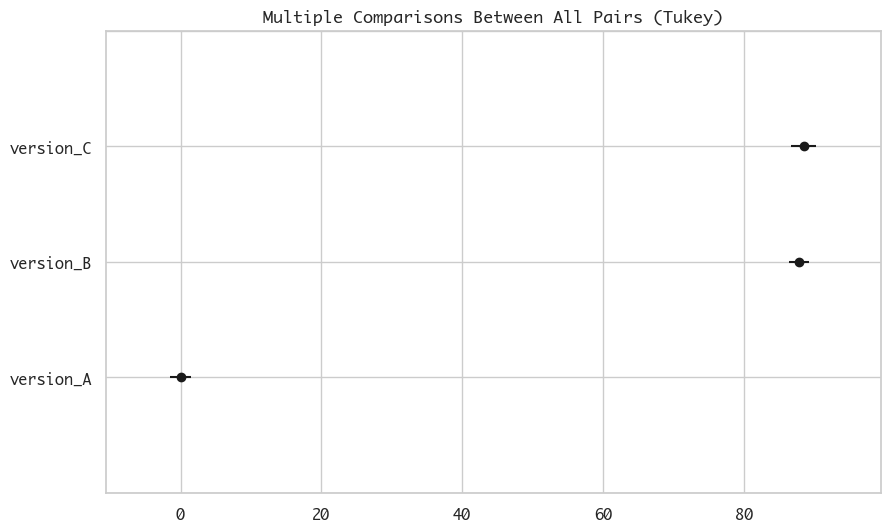

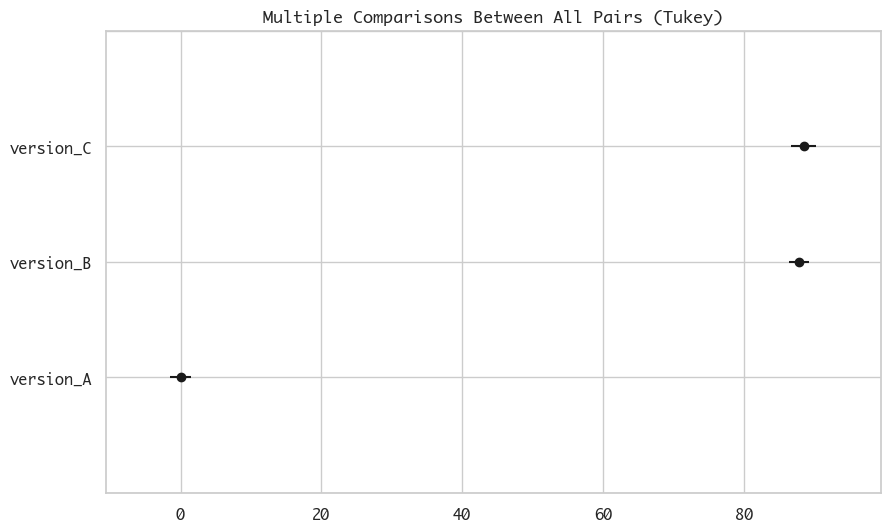

In [68]:
#perform a post-hoc test
tukey_result = pairwise_tukeyhsd(endog = df['purchase_amount'], 
                                 groups = df['ABtest'], 
                                 alpha = 0.05)

print(tukey_result)

tukey_result.plot_simultaneous()

**Explanation of Code:**<br>
In this part, an one-way ANOVA test was conducted to explore the compare the impact of different groups on purchase amount. Then a Tukey HSD post-hoc analysis was conducted.

**Result:**<br>
The results indicate a significant difference between groups, *F* = 3133.23, *p* < 0.001. <br>
From the post-hoc analysis, it can be observed that the mean purchase amount of Group A is significantly lower than Group B, with a mean difference of 87.84, *p* < .001. Therefore, H1b can be rejected.
However, no significant difference was found between Group B and C, with a mean difference of 0.64, *p* = 0.89. Therefore, H2b can be rejected.

**Source of Code:**<br>
[68] 
The orginal code was from https://www.geeksforgeeks.org/how-to-perform-a-one-way-anova-in-python/ as follows:<br>
`f_statistic, p_value = stats.f_oneway(df['purchase_amount'], df['ABtest'])`

Then it was adapted by ChatGPT by adding 
`grouped_data = [df['purchase_amount'][df['ABtest'] == group] for group in df['ABtest'].unique()]`.<br>

[69] was mainly from https://www.statology.org/tukey-test-python/ except for the visualization code `tukey_result.plot_simultaneous()`, which was from ChatGPT.

### 5.2.3 For the moderator

In [69]:
euros_stat = sm.OLS(df["purchase_amount"], 
                    sm.add_constant(df[["GroupA", "GroupB", "GroupC", "social_media"]]))

In [70]:
euros_results = euros_stat.fit()

In [71]:
euros_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        purchase_amount   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     2002.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:20:48   Log-Likelihood:                -89861.
No. Observations:               16034   AIC:                         1.797e+05
Df Residuals:                   16029   BIC:                         1.798e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.378e+14   1.44e+14     -1.655      0.098   -5.19e+14    4.39e+13
GroupA        2.378e+14   1.44e+14      1.655      0.098   -4.39e+13    5.19e+14
GroupB        2.378e+14   1.44e+14      1.655      0.098   -4.39e+13    5.19e+14
GroupC        2.378e+14   1.44e+14      1.655      0.098   -4.39e+13    5.19e+14
social_media    38.5059      1.087     35.427      0.000      36.375      40.636
==============================================================================
Omnibus:                      601.312   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              524.520
Skew:                           0.379   Prob(JB):                    1.26e-114
Kurtosis:                       2.542   Cond. No.                     6.76e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.23e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

**Explanation of Code:**<br>
In this part, an OLS regression model was conducted to explore the relationship between conditions, referral from social media or not and users' purchase amounts. Then the coefficient values of each variable was visualized.

**Result:**<br>
The result shows that this model is significant, p < 0.01, R-squared value is moderate, adjusted *R<sup>2</sup>* = 0.333, indicating that 33% of the variances was explained by this model. And the coefficients for GroupA, B and C were not statistically significantly, with *p* = 0.098 across all groups. For the moderator, there is a statistically significant difference in purchase amount between users from social media channels and those who are not, *p* < 0.001. Users from social media tend to have a purchase amount that is 38.50 units higher than those who are not.

Based on the model, H3 can be retained, as users from social media tend to have a higher purchase amount.

### 5.3. Machine learning models for predictions

Following the requirements, I will use equivalent Logistic and OLS Regression models to make predictions corresponding to the previous chi-squared and ANOVA tests.

#### 5.3.1 For purchase likelihood

In [72]:
features = ["GroupA", "GroupB", "GroupC"]
features_control = ["social_media"]
target = ["_purchase"]

In [73]:
train, test = train_test_split(df, test_size = 0.2, random_state = 42)

In [74]:
#include only IVs
logit_clf = LogisticRegression(max_iter = 1000, fit_intercept = True)
logit_clf.fit(train[features], train[target])

/Users/zhuzhu/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [75]:
#Including IVs and control variable
logit_clf_control = LogisticRegression(max_iter = 1000, fit_intercept = True)
logit_clf_control.fit(train[features_control], train[target])

/Users/zhuzhu/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [76]:
test['predicted_purchase_features'] = logit_clf.predict(test[features])
test['predicted_purchase_features_controls'] = logit_clf_control.predict(test[features_control])

In [77]:
print(confusion_matrix(test['_purchase'], test['predicted_purchase_features']))

[[1227  879]
 [   0 1101]]


In [78]:
print(confusion_matrix(test['_purchase'], test['predicted_purchase_features_controls']))

[[1572  534]
 [ 563  538]]


In [79]:
print(classification_report(test['_purchase'], test['predicted_purchase_features']))

              precision    recall  f1-score   support

           0       1.00      0.58      0.74      2106
           1       0.56      1.00      0.71      1101

    accuracy                           0.73      3207
   macro avg       0.78      0.79      0.73      3207
weighted avg       0.85      0.73      0.73      3207



In [80]:
print(classification_report(test['_purchase'], test['predicted_purchase_features_controls']))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      2106
           1       0.50      0.49      0.50      1101

    accuracy                           0.66      3207
   macro avg       0.62      0.62      0.62      3207
weighted avg       0.66      0.66      0.66      3207



**Explanation of Code:**<br>
In this part, I first split the dataset into training and testing sets. Then, I fit two logistic regression models using scikit-learn, one with moderator and one without. Following that, I printed confusion matrix and classification report respectively for each model.

**Evaluation of Models:**<br>
Based on the classification reports, the model without the moderator performed better overall, achieving an accuracy of 0.73, while the model involving the moderator only reached an accuracy of 0.66. 

For precision, the model without the moderator excelled at predicting the category of users who did not make a purchase, with a perfect precision of 1.00. However, its precision for predicting users who made purchases was lower at 0.56, though still higher than the model involving the moderator.

For recall, the model with the moderator performed better in predicting users who did not make purchases, with a recall of 0.75. However, for predicting users who made purchases, the model without the moderator had a perfect recall of 1.00.

Overall, the model without the moderator performed better.

In [81]:
#explain the model with better performance
explainer = lime_tabular.LimeTabularExplainer(
    training_data = train[features].values,
    feature_names = features,
    class_names = ['Not Purchased', 'Purchased'],
    mode = 'classification'
)

test_instance = test.iloc[0]

exp = explainer.explain_instance(
    data_row = test_instance[features].values,
    predict_fn = logit_clf.predict_proba
)

exp.show_in_notebook(show_table = True)

/Users/zhuzhu/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Explanation of Code:**<br>
In this part I use LIME to explain the previously trained model regarding how does it predict whether users make a purchase or not.

**Interpretation of the LIME model:**<br>
Based on the LIME results, it can be observed that the model predicts the probability that a user did not make any purchases is 0.43, while the probability of making a purchase is 0.57. Users not in Groups A tend to make a purchase, and users in Group C tend to make a purchase. For Group B, users not in this group tend not to buy - in other words, users in Group B are likely to make a purchase.

**Source of Code：**<br>
The original code in this part followed class tutorials:

`data_lime_purchase = df[["GroupA", "GroupB", "GroupC", "social_media", "_purchase"]]` <br>

`class_names_purchase = data_lime_purchase.columns`<br>
`X_data_lime_purchase = data_lime_purchase[["GroupA", "GroupB", "GroupC", "social_media"]].to_numpy()`<br>
`y_data_lime_purchase = data_lime_purchase['_purchase'].to_numpy()`<br>

`explainer = lime.lime_tabular.LimeTabularExplainer(`<br>
    `X_data_lime_purchase,` <br>
    `feature_names = class_names_purchase,` <br>
    `verbose = True,` <br>
    `mode = 'classification')`<br>
    
`print(X_data_lime_purchase[500])`<br>
`exp = explainer.explain_instance(X_data_lime_purchase[500], logit_clf.predict_proba)`<br>
`exp.show_in_notebook(show_table = True)`<br>

The error occurred and indicated that LIME did not expect the input format. I asked ChatGPT and realized it was because the class_names were not being correctly assigned. To solve this, I followed the suggestions from ChatGPT and directly used the split train and test dataset, then re-identified the feature names and class names to perform the LIME model.

### 5.3.2 For purchase amounts

In [82]:
#include only IVs
X_train = sm.add_constant(train[features])
X_test = sm.add_constant(test[features])
y_train = train['purchase_amount']

In [83]:
ols_model = sm.OLS(y_train, X_train).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     1673.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:20:49   Log-Likelihood:                -72409.
No. Observations:               12827   AIC:                         1.448e+05
Df Residuals:                   12823   BIC:                         1.449e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.581e+13   9.84e+13     -0.567      0.5

In [84]:
#include IVs and moderator
X_train_mod = sm.add_constant(train[features + features_control])

In [85]:
ols_model_mod = sm.OLS(y_train, X_train_mod).fit()
print(ols_model_mod.summary())

                            OLS Regression Results                            
Dep. Variable:        purchase_amount   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     1603.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:20:49   Log-Likelihood:                -71926.
No. Observations:               12827   AIC:                         1.439e+05
Df Residuals:                   12822   BIC:                         1.439e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.191e+13   1.47e+14      0.422   

**Explanation of Code:**<br>
In this section, I conducted two OLS regression models to investigate the impact of different groups on purchase amounts: one without a moderator and one with a moderator.

**Evaluation of Models:**<br>
Based on the regression reports, both models were significant (*p* < 0.01). The model with the moderator demonstrated better performance, with an R-squared value of 0.33, indicating that it could explain 33% of the variance, which is higher than the 28% explained by the model without the moderator.

In [86]:
#explain the model
X_train_values = sm.add_constant(X_train[features]).to_numpy()
X_test_values = sm.add_constant(X_test[features]).to_numpy()

In [87]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data = X_train_values,           
    feature_names = ['const'] + features,     
    class_names = ['Low Purchase', 'High Purchase'],  
    mode = 'regression',
    discretize_continuous=True) 

In [88]:
idx = 0
test_instance = X_test_values[idx]

In [89]:
exp = explainer.explain_instance(
    data_row = test_instance,               
    predict_fn = ols_model.predict        
)

exp.show_in_notebook(show_table = True)

**Explanation of Code:**<br>
In this part I use LIME to explain the previously trained OLS Regression model regarding how does it predict users' purchasing amount.

**Interpretation of the LIME model:**<br>
Based on the LIME results, it can be observed that when users in Group A and B, they tend to make lower purchase amounts. While users in Group C, there is a positive impact on their purchase amount.

**Source of Code**:<br>
The code in this part was mainly from class tutorials as follows:

`X_train_values = sm.add_constant(X_train[features]).to_numpy()`
`X_test_values = sm.add_constant(X_test[features]).to_numpy()`

`explainer = lime.lime_tabular.LimeTabularExplainer(`
    `training_data = X_train_values,`          
    `feature_names = ['const'] + features,`     
    `class_names = ['Low Purchase', 'High Purchase'],`  
    `mode = 'regression',`
    `discretize_continuous=True)` 
    
`exp = explainer.explain_instance(`
    `np.array([0,0,0,0,0,0])`               
    `predict_fn = ols_model.predict`        
`)`

`exp.show_in_notebook(show_table = True)`

The same error occurred again and indicated that LIME did not expect the input format. Therefore, I followed ChatGPT's suggestion again to add line[88] to calculate the model.

## Evaluation 

This section provides the answer to the communication challenge, discussing the results (hypothesis testing) in order to answer the general RQ. Creativity in how to summarize the findings (including visualizations) is a plus.

This section also provides a set of implications (i.e., now that we know the answer to the RQ, what does it mean for the organization/process/challenge? what should the organization do?).

**Answer:**<br>

Based on the statistical results, H1a, H1b, H2a, and H2b were rejected, while H3 was retained. Users exposed to Group A (emotionally positive reviews) did not make any purchases, while those exposed to the control group had a slightly higher likelihood of making a purchase than those in Group B (functionally positive reviews). However, the purchase amounts between these two groups did not show statistically significant differences. When referral is involved as a moderator, users referred from social media atend to have a higher purchase amount compared to those who are not referred from social media. To answer the research question, emotionally positive reviews do not drive sales, whereas functionally positive and regular positive content can slightly increase sales (see the folowing visualization).

![Visualization of relationship](illustration.png)

For Xiaomi, this conclusion suggests that the content of positive online consumer reviews does not significantly impact sales. Instead, the company should focus more on understanding its customers' features and preferences. In this study, individuals referred from social media displayed a higher willingness to purchase, likely because they are already familiar with the Xiaomi brand (such as being exposed to this brand on social media before) or have followed its social media accounts. 

Therefore, according to the data analysis result, the recommendations for Xiaomi are as follows:<br>
(1) It should target its marketing efforts more towards its existing social media followers, for example, increasing the appeal of its post visuals and providing more positive content (both emotional and functional) based on its phone features.<br>
(2) It should also invest more in social media advertising to reach more potential users and thus increase brand impressions.<br>
(3) It can also be inferred that promotional content targeted at users who are familiar with the brand will be more effective in driving sales. Therefore, both online and offline advertisements should be increased to help build brand awareness among users. <br>
(4) Also, based on this dataset, Xiaomi should avoid using emotionally positive content in its promotions, as it does not lead users to make purchases.

*(Wordcount: 333)*

## Limitations and Next Steps

In this section you should discuss all the relevant limitations. This includes the limitations of the analysis and of the data, thus consolidating and extending the discussion already included in the earlier sections (e.g., Data Collection, Data Exploration and Modelling), and what do these limitations mean to the conclusions and to the overall challenge.

In other words, make sure that you are at least covering:
* The dataset(s) itself, including how the data collection may have created limitations
* Limitations associated with the decisions taken during the data understanding & preparation
* Limitations about the model and hypothesis testing (including fit, selection of variables)
* Alternative interpretations to the findings
* You need also to suggest next steps/actions to overcome the most important limitations (as indicated in the assignment criteria).

**Answer:**

(1) The potential limitation of the data collection is that it only includes purchases from official websites, while a large number of third-party vendors were overlooked, which could yield significantly different results compared to official websites. Relying solely on online data collection could also overlook the offline market, potentially leading to inaccurate results due to the limited sample size. <br>

(2) The moderator variable `social_media` only includes a few channels, while others that may also fall under social media could have been excluded.

(3) Since the study examines the respective impacts of different types of online consumer reviews, it overlooks the interactive or moderating effects between emotional and functional comments, as demonstrated by Jang et al. (2021). In addition, the unbalanced dataset used in this study could significantly influence the model's fit.

(4) An alternative interpretation of the positive moderating effect of social media is to consider the demographics of social media users. For example, users referred from this channel may be younger and, therefore, have a higher need to change their phones compared to senior citizens. In this case, Xiaomi should focus on targeting a younger age group in its marketing efforts.

(5) Based on the current progress, I would suggest the following next steps:
- Collect a more balanced dataset that includes purchases in Group A.
- Set up another treatment group that includes both emotionally and functionally positive consumer reviews to explore their interactive effects.

*(Wordcount: 235)*

## Ethical and Normative Considerations

This section should discuss the considerations the organization needs to have. Are there ethical or more general normative aspects that need to be taken into account? Drawing directly from the literature discussed in class (and other literature), what should readers of the data analysis be mindful about? Make sure to cite the relevant literature. 

This discussion can relate to the actual dataset/analysis that was done, to the recommendations/implications, and to the action plan suggested in the previous sections.

**Answer:**

The first issue is users' right to informed consent in this specific case. Users will not know they are being exposed to only certain types of positive reviews. Although the A/B test design proposed in the brief includes several actions to mitigate the impact (such as keeping the proportion of participants very low, using existing and authentic positive reviews, and leaving neutral and negative reviews unchanged), users assigned to this study will still be influenced, potentially affecting their rights as consumers.

The second potential ethical issue concerns data privacy. While users logging into mi.com have granted their cookies (or partial cookies) to the company, allowing it to use their data, this can still lead to several risks. For instance, their data is now repurposed to monitor and increase sales without detailed explanation. A particular concern is data spillovers (Tucker, 2009), as users' shopping profiles contain personal information that could be tracked to reveal specific behavioral patterns.

Furthermore, while we are using machine learning models to predict users' behavior in this study, readers of the data analysis should also pay attention to the trust issue between humans and artificial intelligence (Hind, 2019). Explainable AI, which was adopted in this study, provides an approach to explain how machine learning models make their decisions. However, this should not only be presented in research but should also be communicated by the company if AI is used to handle personal data, ensuring that data subjects are properly informed.

*(Wordcount: 244)*

## References

If you use scientific papers, cite them using APA style (and add a reference section at the end). If you are using pieces of code written by someone else, add a comment in the appropriate section and add a link to the source.

- Giachetti, C. (2017). Xiaomi: A High-End Low-Price Smartphone Start-up Trying to Diffuse Its Own Platform. In *Smartphone Start-ups* (pp. 49–82). Springer International Publishing. https://doi.org/10.1007/978-3-319-67973-0_3
- Hind, M. (2019). Explaining explainable AI. XRDS: Crossroads, *The ACM Magazine for Students*, 25(3), 16-19.
- Jang, S., Chung, J., & Rao, V. R. (2021). The importance of functional and emotional content in online consumer reviews for product sales: Evidence from the mobile gaming market. *Journal of Business Research*, 130, 583–593. https://doi.org/10.1016/j.jbusres.2019.09.027
- Lovett, M. J., Peres, R., & Shachar, R. (2013). On Brands and Word of Mouth. *Journal of Marketing Research*, 50(4), 427-444. https://doi.org/10.1509/jmr.11.0458 
- Tucker, C. (2019). Privacy, Algorithms, and Artificial Intelligence. *In The Economics of Artificial Intelligence* (pp. 423–438). University of Chicago Press. https://doi.org/10.7208/9780226613475-019